In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)


In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)    # compressed latent vector
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)      # flatten input image
        encoded = self.encoder(x)    # compression
        decoded = self.decoder(encoded)  # reconstruction
        return decoded


In [4]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [1/10], Loss: 0.014561
Epoch [2/10], Loss: 0.014137
Epoch [3/10], Loss: 0.013778
Epoch [4/10], Loss: 0.013505
Epoch [5/10], Loss: 0.013235
Epoch [6/10], Loss: 0.013025
Epoch [7/10], Loss: 0.012844
Epoch [8/10], Loss: 0.012652
Epoch [9/10], Loss: 0.012499
Epoch [10/10], Loss: 0.012359


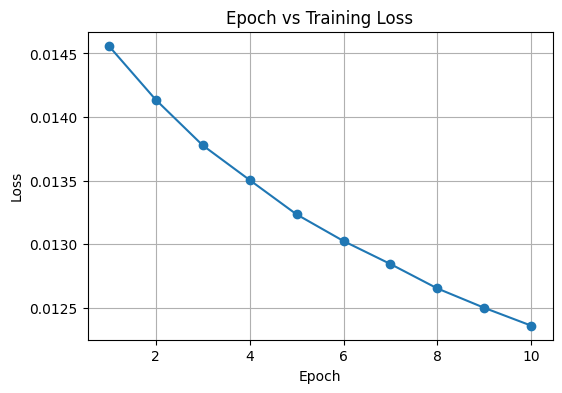

In [19]:
# Track loss during training
num_epochs = 10
train_loss = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        outputs = model(images)
        loss = criterion(outputs, images.view(-1, 28 * 28))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_loss.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")

# Plot Epoch vs Loss
plt.figure(figsize=(6,4))
plt.plot(range(1, num_epochs+1), train_loss, marker='o')
plt.title('Epoch vs Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [20]:
dataiter = iter(test_loader)
images, _ = next(dataiter)

In [21]:
reconstructed = model(images)
reconstructed = reconstructed.view(-1, 1, 28, 28).detach()

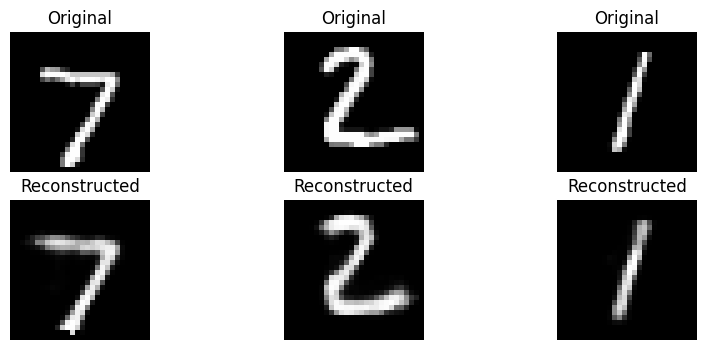

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
for i in range(3):
    # Original images
    axes[0, i].imshow(images[i].squeeze(), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')
    
    # Reconstructed images
    axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')

plt.show()